In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))

traindex = train_data.index
testdex = test_data.index

In [3]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Uno los datos por medio de concat, los test data son los últimos 418 registros, es necesario resetear el índice para evitar valores duplicados

In [3]:
titanic = pd.concat([train_data, test_data],ignore_index=True)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.shape

(1309, 12)

Eliminamos el ID, el nombre y el ticket

In [5]:
titanic.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)

Tambien se observa que los 418 registros que no tienen 'Survived' son los datos test

In [6]:
titanic.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


### Indagamos qué información hay en las cabinas

Con la intención de revisar si las cabinas pueden tener alguna influencia en la sobrevivencia se reemplazan los Nan de la columna cabinas

In [8]:
cabinas =titanic.groupby('Cabin')['Pclass'].count()


In [9]:
cabinas = pd.pivot_table(titanic, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')

In [10]:
titanic['Cabin'].fillna('N', inplace=True)

In [11]:
titanic.loc[(titanic.Cabin != 'N')& (titanic.Pclass == 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,female,38.0,1,0,71.2833,C85,C
3,1.0,1,female,35.0,1,0,53.1000,C123,S
6,0.0,1,male,54.0,0,0,51.8625,E46,S
11,1.0,1,female,58.0,0,0,26.5500,C103,S
23,1.0,1,male,28.0,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...
1291,NaN,1,female,30.0,0,0,164.8667,C7,S
1295,NaN,1,male,43.0,1,0,27.7208,D40,C
1298,NaN,1,male,50.0,1,1,211.5000,C80,C
1302,NaN,1,female,37.0,1,0,90.0000,C78,Q


In [12]:
cabin_only = titanic[["Cabin"]].copy()

In [13]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [14]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [15]:
cabin_only

,Cabin,Deck,Room
0,N,N,NaN
1,C85,C,85.0
2,N,N,NaN
3,C123,C,123.0
4,N,N,NaN
...,...,...,...
1304,N,N,NaN
1305,C105,C,105.0
1306,N,N,NaN
1307,N,N,NaN


In [16]:
cabin_only['Deck'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [17]:
titanic = titanic.join(cabin_only['Deck']).copy()

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0.0,3,male,22.0,1,0,7.2500,N,S,N
1,1.0,1,female,38.0,1,0,71.2833,C85,C,C
2,1.0,3,female,26.0,0,0,7.9250,N,S,N
3,1.0,1,female,35.0,1,0,53.1000,C123,S,C
4,0.0,3,male,35.0,0,0,8.0500,N,S,N


In [19]:
titanic.drop({'Cabin'}, axis = 'columns', inplace= True)

In [20]:
def tabla_plot_cat(df,col):
    frec = df[col].value_counts()
    porc = df[col].value_counts(normalize = True)
    tabla =pd.DataFrame({"Frecuencias Abs":frec,"Porcentajes(%)":porc})
    
        
    plt.subplot(1,2,1)
    porc.plot(kind='bar',title= col + '%')

    plt.subplot(1,2,2)
    frec.plot(kind='barh',title= col + ' - Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    print(tabla)

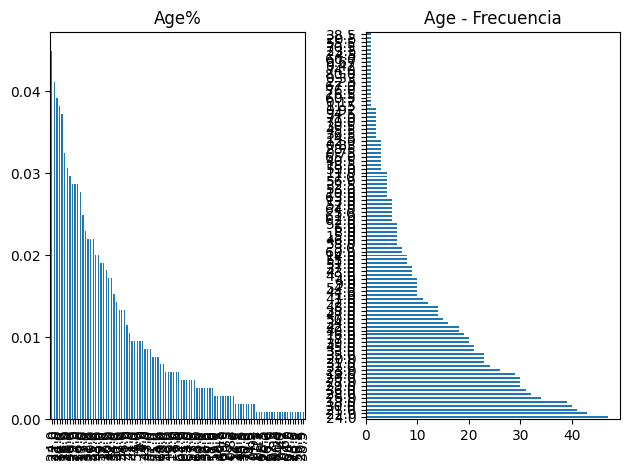

      Frecuencias Abs  Porcentajes(%)
24.0               47        0.044933
22.0               43        0.041109
21.0               41        0.039197
30.0               40        0.038241
18.0               39        0.037285
...               ...             ...
23.5                1        0.000956
70.5                1        0.000956
55.5                1        0.000956
20.5                1        0.000956
38.5                1        0.000956

[98 rows x 2 columns]


In [21]:
tabla_plot_cat(titanic,'Age')

In [22]:
age_null = titanic[titanic.Age.isnull()]

Los de tercera clase son los que tienen la mayor cantidad de registros de edad perdido +  
el máximo de relaciones de padres/hijos 8 (parch) y máximo de esposo(a)/hermano 9

In [23]:
age_null.groupby('Pclass')[('SibSp','Parch')].describe()

C:\Users\cj_li\AppData\Local\Temp\ipykernel_24620\1580944037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_null.groupby('Pclass')[('SibSp','Parch')].describe()


SibSp                                               Parch            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                        
1        39.0  0.153846  0.365518  0.0  0.0  0.0  0.0  1.0   39.0  0.025641   
2        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   16.0  0.000000   
3       208.0  0.581731  1.607066  0.0  0.0  0.0  0.0  8.0  208.0  0.302885   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.160128  0.0  0.0  0.0  0.0  1.0  
2       0.000000  0.0  0.0  0.0  0.0  0.0  
3       1.058479  0.0  0.0  0.0  0.0  9.0

In [24]:
titanic_selec = titanic[['Survived','Pclass','Sex']]

In [25]:
titanic = titanic.reset_index(drop=True)

In [26]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck'],
      dtype='object')

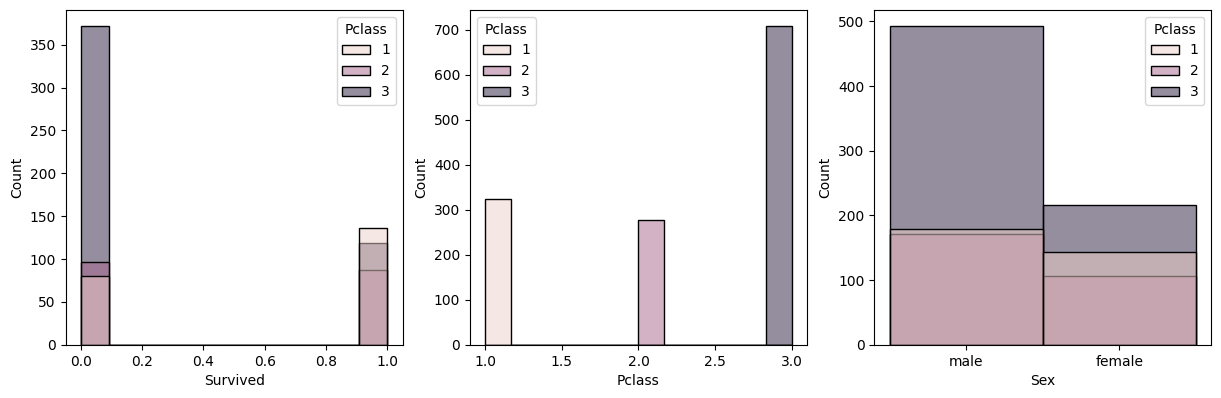

In [27]:
plt.figure(figsize=(20,20))
for i, v in enumerate(titanic_selec):
    plt.subplot(4,4,i+1)
    sns.histplot(x = v , data = titanic, hue='Pclass')
    
plt.show()

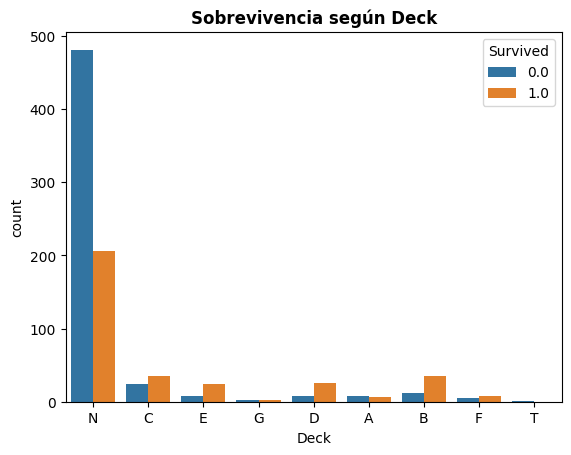

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
N,70.014556,29.985444
T,100.000000,0.000000


In [28]:
sns.countplot(x='Deck', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Deck', weight='bold')
plt.show()

table = pd.crosstab(titanic['Deck'], titanic['Survived'], normalize='index')
table*100

In [29]:
titanic_sin_N = titanic.query("Deck != 'N'")

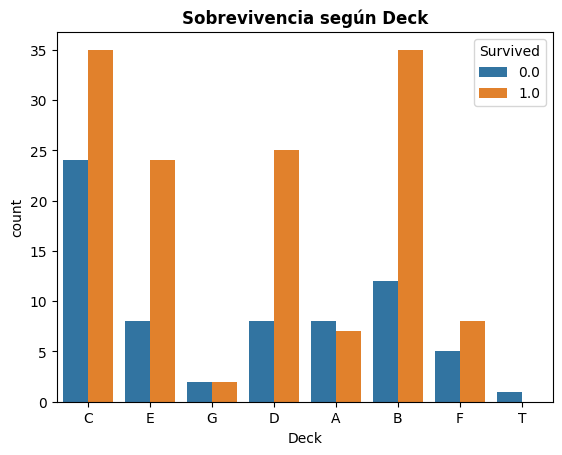

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000


In [30]:
sns.countplot(x='Deck', hue='Survived', data=titanic_sin_N)
plt.title('Sobrevivencia según Deck', weight='bold')
plt.show()

table = pd.crosstab(titanic_sin_N['Deck'], titanic_sin_N['Survived'], normalize='index')
table*100

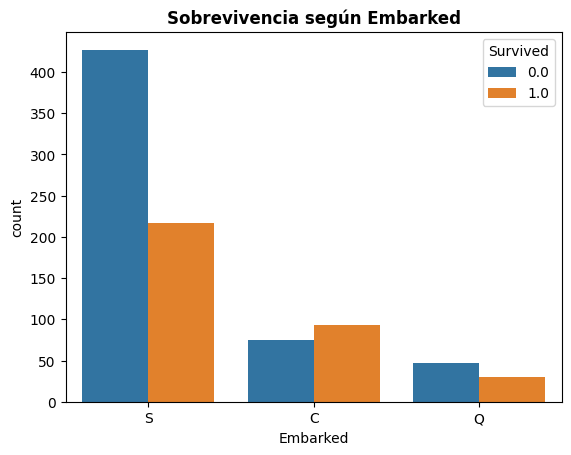

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [44]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

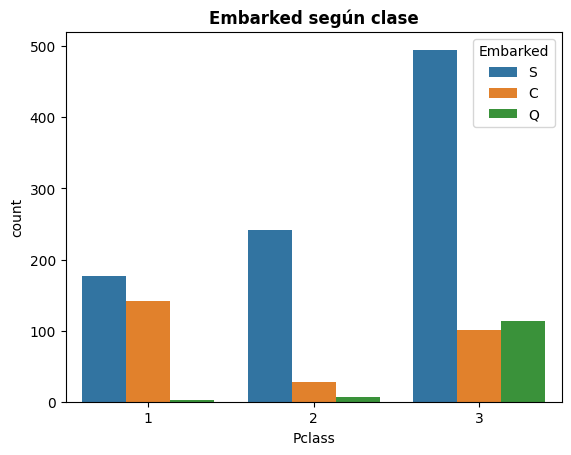

Embarked,C,Q,S
Pclass,,,
1,43.925234,0.934579,55.140187
2,10.108303,2.527076,87.364621
3,14.245416,15.937941,69.816643


In [46]:
sns.countplot(x='Pclass', hue='Embarked', data=titanic)
plt.title('Embarked según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Embarked'], normalize='index')
table*100

Vemos como se comporta la supervivencia de las personas según tenian familia o venian solos

In [31]:
titanic.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    4    5    3    6
Survived SibSp                                       
0.0      0      374.0  13.0   8.0  1.0  2.0    -    -
         1       59.0  23.0   7.0  3.0  2.0  2.0  1.0
         2       12.0   1.0   2.0    -    -    -    -
         3          -   7.0   5.0    -    -    -    -
         4          -   9.0   6.0    -    -    -    -
         5          -     -   5.0    -    -    -    -
         8          -     -   7.0    -    -    -    -
1.0      0      163.0  25.0  21.0    -    -  1.0    -
         1       64.0  34.0  12.0    -  1.0  1.0    -
         2        4.0   6.0   2.0    -    -  1.0    -
         3        2.0     -   2.0    -    -    -    -
         4          -     -   3.0    -    -    -    -

Se crea la columna que indica si la persona tiene familia (1) o iba sola (0)

In [32]:
titanic['Family'] = np.where(((titanic['Parch'] > 0) & (titanic['SibSp'] > 0)), 1, 0)

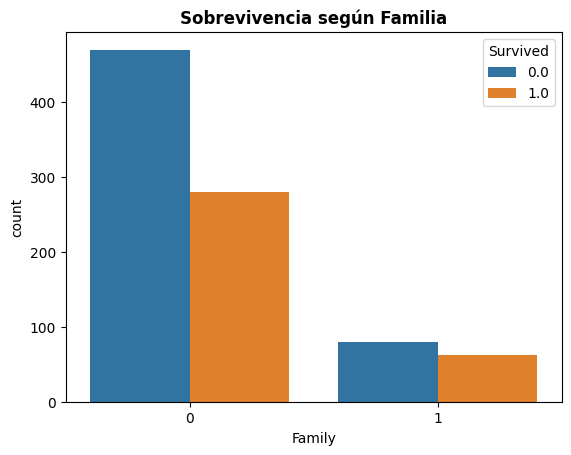

Survived,0.0,1.0
Family,,
0,0.626168,0.373832
1,0.563380,0.436620


In [33]:
sns.countplot(x='Family', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Familia', weight='bold')
plt.show()

table = pd.crosstab(titanic['Family'], titanic['Survived'], normalize='index')
table

Acá se imputa la edad faltante como el promedio de la clase, pero no lo haré ahora, primero voy a probar hacer una regresión lineal para predecir la edad.

In [36]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [37]:
class_age = {1:39, 2:29, 3:25}

In [38]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [39]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(fill_age, axis=1)

## Imputación de MV

Observamos las otras variables que tienen datos nulos

In [34]:
titanic.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Deck          0
Family        0
dtype: int64

In [35]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0}).astype('category')

In [38]:
titanic_2 = titanic.copy()

In [37]:
titanic = titanic_2.copy()

Imputaré el resto de las variables numéricas

In [39]:
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [40]:
class_fare = {1:87.508992, 2:21.179196, 3:13.302889}

In [41]:
def fill_fare(columns):
    fare = columns[0]
    pclass = np.int64(columns[1])
    return class_fare[pclass] if pd.isnull(fare) else fare

In [42]:
titanic['Fare'] = titanic[['Fare', 'Pclass']].apply(fill_fare, axis=1)

In [43]:
titanic.groupby('Pclass').describe(include=['category'])

Sex                
       count unique top freq
Pclass                      
1        323      2   1  179
2        277      2   1  171
3        709      2   1  493

Imputamos la categoría Embarked según el dato que más se repite

In [49]:
titanic['Embarked']= titanic['Embarked'].fillna('S')

Paso las variables categóricas

In [50]:
titanic[['Survived','Pclass','Sex','Embarked','Deck','Family']] = titanic[['Survived','Sex','Pclass','Embarked','Deck','Family']].astype('category')

En los pasos siguientes, ejecuto un encoder para trabajar con variables numéricas

In [94]:
titanic['Deck'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [95]:
titanic[['class_1', 'class_2','class_3']] = pd.get_dummies(titanic_2['Pclass'])

In [96]:
titanic[['Embarked_S', 'Embarked_C','Embarked_Q']] = pd.get_dummies(titanic['Embarked'])

In [97]:
titanic[['Deck_N', 'Deck_C', 'Deck_E', 'Deck_G', 'Deck_D', 'Deck_A', 'Deck_B', 'Deck_F', 'Deck_T']] = pd.get_dummies(titanic['Deck'])

In [98]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Family', 'class_1', 'class_2', 'class_3',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Deck_N', 'Deck_C', 'Deck_E',
       'Deck_G', 'Deck_D', 'Deck_A', 'Deck_B', 'Deck_F', 'Deck_T'],
      dtype='object')

C:\Users\cj_li\AppData\Local\Temp\ipykernel_7476\1542658970.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = titanic.corr(method='pearson')


<AxesSubplot: >

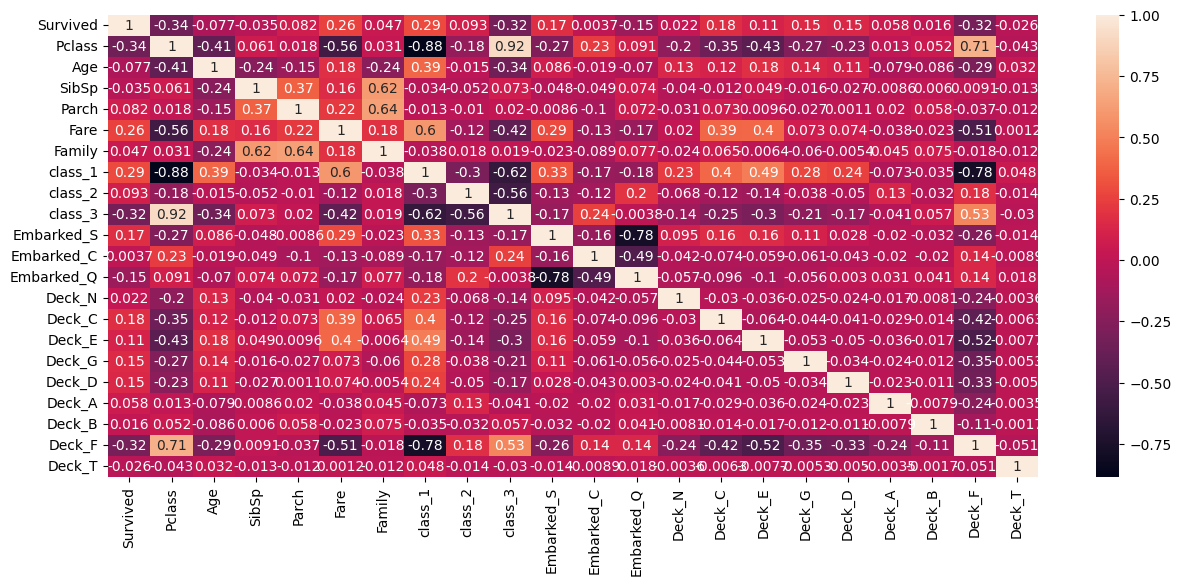

In [99]:
#Observamos cómo va la correlación de los datos hasta el momento...
plt.rcParams["figure.figsize"] = [15,6]
corr_values = titanic.corr(method='pearson')
sns.heatmap(corr_values, annot= True)

### Realizó un encoder, para las variables categóriacas.  
### Posteriormente, estandarizo.  
### Luego, imputar los datos de edad utilizando clasificación con KNeighbors

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [52]:
titanic_cat = titanic.select_dtypes(include=['object', 'category'])

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
titanic_num= titanic.select_dtypes(include=numerics)
print(titanic_num.shape)
titanic_num.head()

(1309, 4)


,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [54]:
labels_cat = preprocessing.LabelEncoder()
train_titanic_enc = titanic_cat.apply(labels_cat.fit_transform)
train_titanic_enc.head(5)

,Survived,Pclass,Sex,Embarked,Deck,Family
0,0,1,2,2,7,0
1,1,0,0,0,2,0
2,1,0,2,2,7,0
3,1,0,0,2,2,0
4,0,1,2,2,7,0


In [101]:
titanic_enc = pd.concat([titanic_num,train_titanic_enc], ignore_index=True, axis = 1)
titanic_enc.columns = titanic_num.columns.tolist() + titanic_cat.columns.tolist()
titanic_enc.head()

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked,Deck,Family
0,22.0,1,0,7.2500,0,1,2,2,7,0
1,38.0,1,0,71.2833,1,0,0,0,2,0
2,26.0,0,0,7.9250,1,0,2,2,7,0
3,35.0,1,0,53.1000,1,0,0,2,2,0
4,35.0,0,0,8.0500,0,1,2,2,7,0


Notamos que a los MV de la columna survived los categorizó con un 2

In [105]:
titanic_enc['Survived'].value_counts()

0    549
2    418
1    342
Name: Survived, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler

In [95]:
titanic_enc_y = pd.DataFrame(titanic_enc['Survived'])
titanic_enc = titanic_enc.drop(['Survived'], axis='columns')

In [77]:
scaler = StandardScaler().fit(titanic_enc)
titanic_esc = pd.DataFrame(scaler.transform(titanic_enc))
titanic_esc.columns = titanic_enc.columns.tolist() 
titanic_esc.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Deck,Family
0,-0.547050,0.481288,-0.445,-0.503271,0.743497,0.841916,0.622279,0.507835,-0.432161
1,0.563552,0.481288,-0.445,0.734756,-1.344995,-1.546098,-1.834926,-1.923608,-0.432161
2,-0.269400,-0.479087,-0.445,-0.490220,-1.344995,0.841916,0.622279,0.507835,-0.432161
3,0.355314,0.481288,-0.445,0.383198,-1.344995,-1.546098,0.622279,-1.923608,-0.432161
4,0.355314,-0.479087,-0.445,-0.487804,0.743497,0.841916,0.622279,0.507835,-0.432161


In [78]:
titanic_esc.isnull().sum()

Age         263
SibSp         0
Parch         0
Fare          0
Pclass        0
Sex           0
Embarked      0
Deck          0
Family        0
dtype: int64

### En este punto, probaré imputar los MV de edad por medio de KNNImputer

In [79]:
from sklearn.impute import KNNImputer

In [80]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

# Imputar los valores perdidos en los datos
titanic_imputed = imputer.fit_transform(titanic_esc)

In [81]:
titanic_imputed = pd.DataFrame(titanic_imputed, columns=titanic_esc.columns)

In [82]:
titanic_imputed['Age_original'] = titanic_esc['Age']

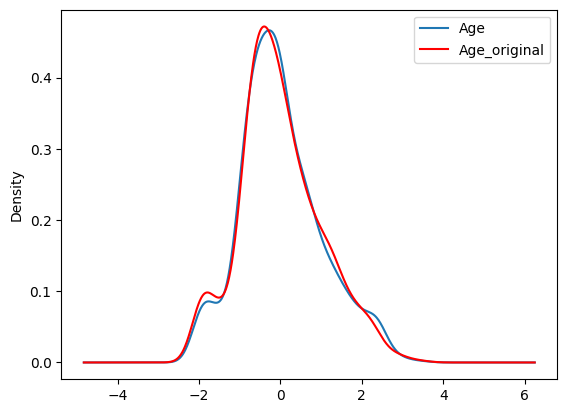

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_imputed['Age'].plot(kind='kde', ax=ax)

titanic_imputed['Age_original'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Modelamiento

### Separación de muestras

Separaré las muestras:  

En primer lugar almacenaré los datos con edad faltante y los trataré como datos target.  
Posteriormente, eliminaré los registros faltantes del dataframe prinpcipal y lo trataré como subdata, con la cual haré testeo y entrenamiento

In [85]:
#Eliminar la columna de edad original
titanic_X = titanic_imputed.drop(['Age_original'], axis='columns')

In [110]:
titanic_X.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Deck,Family
0,-0.547050,0.481288,-0.445,-0.503271,0.743497,0.841916,0.622279,0.507835,-0.432161
1,0.563552,0.481288,-0.445,0.734756,-1.344995,-1.546098,-1.834926,-1.923608,-0.432161
2,-0.269400,-0.479087,-0.445,-0.490220,-1.344995,0.841916,0.622279,0.507835,-0.432161
3,0.355314,0.481288,-0.445,0.383198,-1.344995,-1.546098,0.622279,-1.923608,-0.432161
4,0.355314,-0.479087,-0.445,-0.487804,0.743497,0.841916,0.622279,0.507835,-0.432161


In [160]:
titanic_y = titanic_enc_y
titanic_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [161]:
titanic = pd.concat([titanic_y,titanic_X], ignore_index=True, axis = 1)
columnas = list(titanic_y.columns) + list(titanic_X.columns)
titanic.columns = columnas

In [162]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Deck,Family
0,0,-0.547050,0.481288,-0.445,-0.503271,0.743497,0.841916,0.622279,0.507835,-0.432161
1,1,0.563552,0.481288,-0.445,0.734756,-1.344995,-1.546098,-1.834926,-1.923608,-0.432161
2,1,-0.269400,-0.479087,-0.445,-0.490220,-1.344995,0.841916,0.622279,0.507835,-0.432161
3,1,0.355314,0.481288,-0.445,0.383198,-1.344995,-1.546098,0.622279,-1.923608,-0.432161
4,0,0.355314,-0.479087,-0.445,-0.487804,0.743497,0.841916,0.622279,0.507835,-0.432161


In [167]:
titanic_train = titanic.query('Survived != 2')
titanic_test = titanic.query('Survived == 2')

In [168]:
titanic_test = titanic_test.drop(['Survived'], axis='columns')

In [119]:
titanic_train_X = titanic_train.drop(['Survived'], axis='columns')
titanic_train_y = pd.DataFrame(titanic_train['Survived'])

## Probar modelos

### División de datos

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
train_X, test_X, train_y, test_y = train_test_split(titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

### Primer arpoach con RF

In [125]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [135]:
train_X.shape

(712, 9)

In [126]:
#entrenamos el random forest
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)

pred_values_rf = rf_model.predict(test_X)
print(classification_report(test_y,pred_values_rf))
print(confusion_matrix(test_y,pred_values_rf))

C:\Users\cj_li\AppData\Local\Temp\ipykernel_24620\2748238972.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_X, train_y)


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       113
           1       0.78      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[100  13]
 [ 20  46]]


### Hacemos un ajuste de parámetros

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [1,2,3,5,7],
    'max_features' : [2,3,5,7,9]
}

opt_rf_model = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
opt_rf_model.fit(train_X,train_y)
pred_values_rf = opt_rf_model.predict(test_X)

print(opt_rf_model.best_params_)
print(classification_report(test_y,pred_values_rf))
print(confusion_matrix(test_y,pred_values_rf))

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 5, 'max_features': 9, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       113
           1       0.79      0.76      0.78        66

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

[[100  13]
 [ 16  50]]


### Segundo arpoach con árboles decisión

In [127]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(train_X, train_y)
pred_values_tree = tree_model.predict(test_X)
print(classification_report(test_y,pred_values_tree))
print(confusion_matrix(test_y,pred_values_tree))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       113
           1       0.76      0.67      0.71        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

[[99 14]
 [22 44]]


### Tercer aproach con ADA

In [128]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(train_X, train_y)

pred_values_ab = ab_model.predict(test_X)
print(classification_report(test_y,pred_values_ab))
print(confusion_matrix(test_y,pred_values_ab))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       113
           1       0.71      0.76      0.74        66

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 20]
 [16 50]]


c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4. GBM

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(train_X, train_y)

pred_values_gbm = gbm_model.predict(test_X)
print(classification_report(test_y,pred_values_gbm))
print(confusion_matrix(test_y,pred_values_gbm))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.77      0.71      0.74        66

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[99 14]
 [19 47]]


c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
# Otro método de optimizar hiper-parámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [139]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(100, 1000),
                'max_depth': sp_randInt(2,7)
             }

opt_gbm_model = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions = param_dist, cv = 5, n_iter= 300,n_jobs=-1)
opt_gbm_model.fit(train_X,train_y)
pred_values_gbm = opt_gbm_model.predict(test_X)

print(opt_gbm_model.best_params_)
print(classification_report(test_y,pred_values_gbm))
print(confusion_matrix(test_y,pred_values_gbm))

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.10833127319657432, 'max_depth': 2, 'n_estimators': 295}
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       113
           1       0.80      0.71      0.75        66

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

[[101  12]
 [ 19  47]]


### 5. XGBoost

In [131]:
from xgboost import XGBClassifier

In [141]:
xgb_model = XGBClassifier()
xgb_model.fit(train_X, train_y)

pred_values_xgb = xgb_model.predict(test_X)
print(classification_report(test_y,pred_values_xgb))
print(confusion_matrix(test_y,pred_values_xgb))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       113
           1       0.79      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[101  12]
 [ 20  46]]


1.1 lo tuneamos

In [142]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(100, 1000),
                'max_depth': sp_randInt(2,7)
             }

opt_xgb_model = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions = param_dist, cv = 5, n_iter= 300,n_jobs=-1)
opt_xgb_model.fit(train_X,train_y)
pred_values_xgb = opt_xgb_model.predict(test_X)

print(opt_xgb_model.best_params_)
print(classification_report(test_y,pred_values_xgb))
print(confusion_matrix(test_y,pred_values_xgb))

{'learning_rate': 0.0026769933553979497, 'max_depth': 5, 'n_estimators': 288}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 18  48]]


### El modelo con mejores métricas de predicción fue RandomForest.  

Probamos cómo nos va con RandomForest con Bagging

In [145]:
##para corregir el problema del vector objetivo
train_y = np.ravel(train_y)

In [146]:
# Random Forest con Bagging

rf_bagging = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [10,50,100,200,500],
               'max_depth':[None, 3, 5]}

rf_bagging_grid = GridSearchCV(rf_bagging,param_grid)
rf_bagging_grid.fit(train_X,train_y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [147]:
print('Mejores Parametrros para RandomForest con Bagging:', rf_bagging_grid.best_params_)

Mejores Parametrros para RandomForest con Bagging: {'max_depth': 5, 'n_estimators': 50}


In [148]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [149]:
rf_bagging_pred = rf_bagging_grid.predict(test_X)
print('Accuracy score para RandomForest con Bagging:', accuracy_score(test_y, rf_bagging_pred))
print('Matriz de confusión para RandomForest con Bagging:')
print(confusion_matrix(test_y, rf_bagging_pred))

Accuracy score para RandomForest con Bagging: 0.8435754189944135
Matriz de confusión para RandomForest con Bagging:
[[101  12]
 [ 16  50]]


El modelo RF con Bagging y ajuste de parámetros le achuntó más a los que sobreviven

In [174]:
print(classification_report(test_y,rf_bagging_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       113
           1       0.81      0.76      0.78        66

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



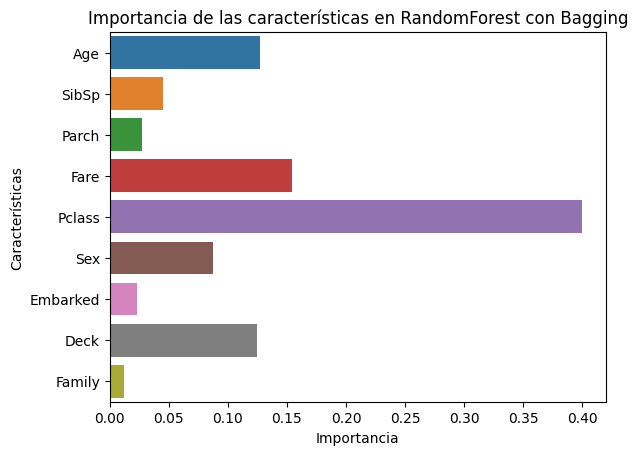

In [150]:
# Obtener la importancia de las caracteristicas en el modelo.

feature_importance = rf_bagging_grid.best_estimator_.feature_importances_

# Crear un gráfico de barras de la importancia de las características
sns.barplot(x=feature_importance, y=titanic_train_X.columns)
plt.title('Importancia de las características en RandomForest con Bagging')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [170]:
# Hacer predicciones en el conjunto de prueba con el modelo
y_pred = rf_bagging_grid.best_estimator_.predict(titanic_test)

In [172]:
y_pred = pd.DataFrame(y_pred)
columnas = ['Survived']
y_pred.columns = columnas

In [183]:
y_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [178]:
id =test_data['PassengerId']

In [180]:
predic = pd.concat([id, y_pred], axis=1)

In [181]:
predic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [182]:
predic.to_csv('submission_CL.csv', index=False)